<a href="https://colab.research.google.com/github/2ndeyBlaq/EDA-of-Car-Insurance-Cold-Calls/blob/main/Cold_Call_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

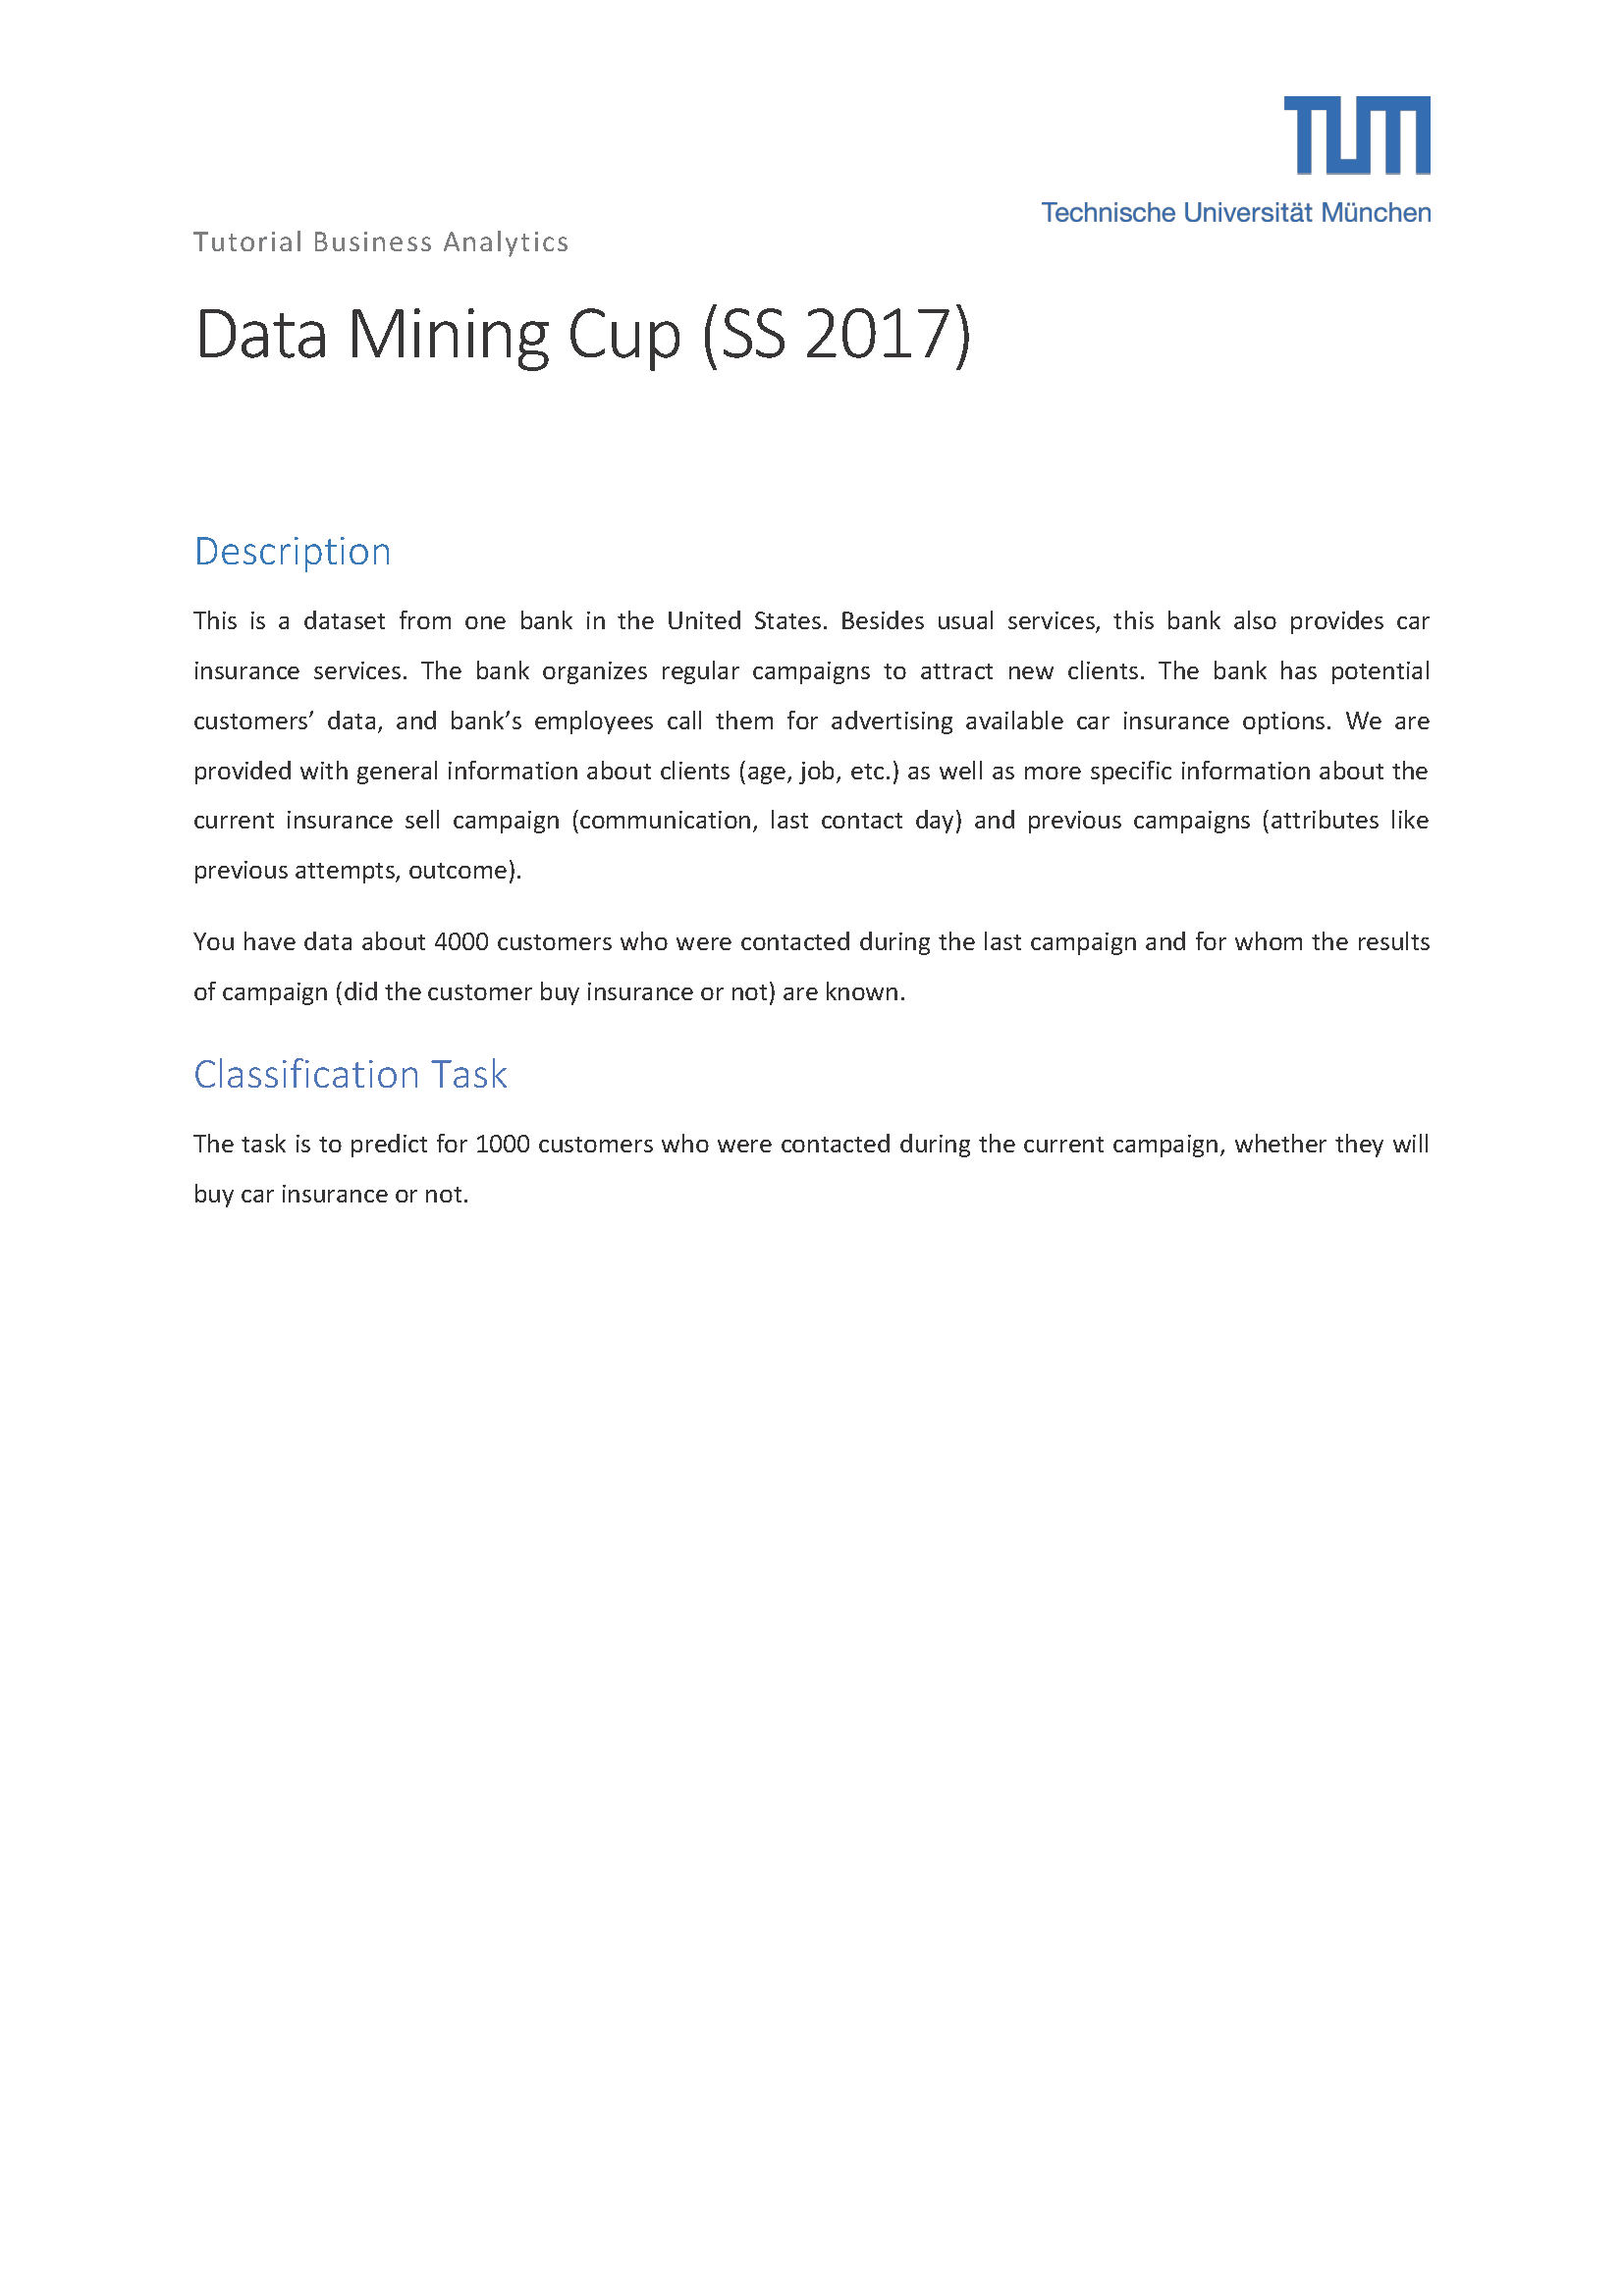

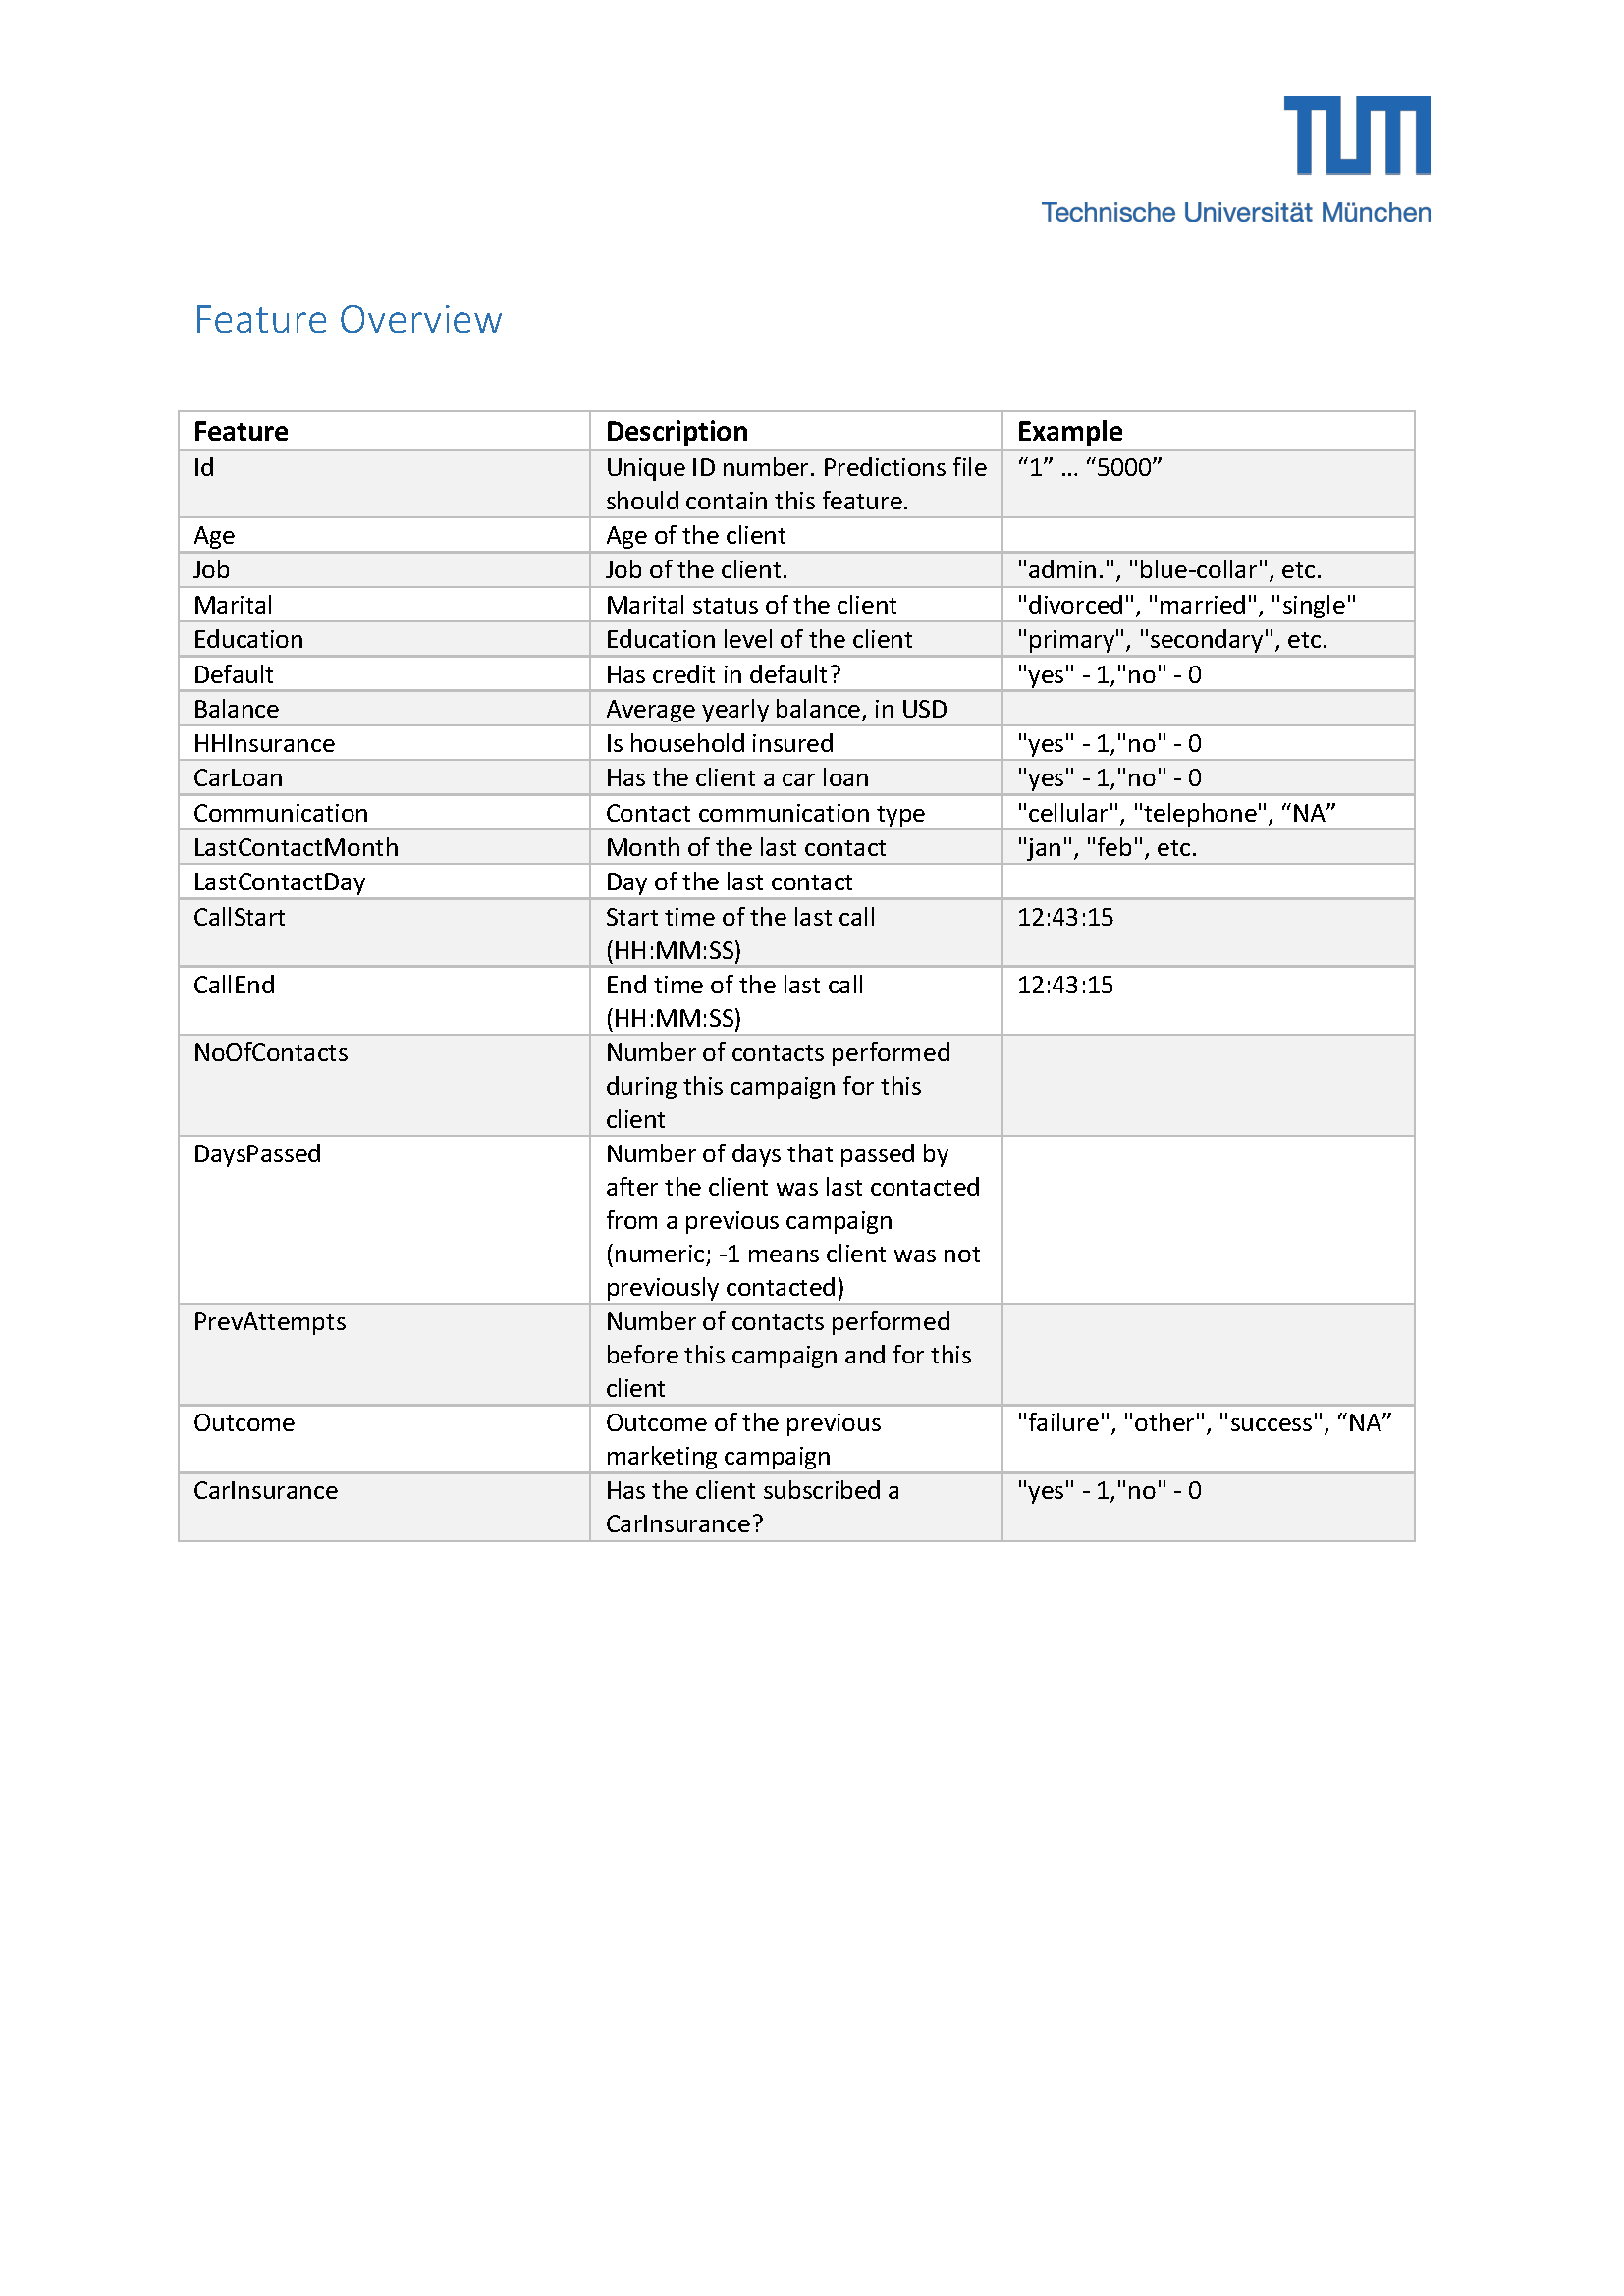

**Import libraries**

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [90]:
# df = pd.read_csv(io.BytesIO(uploaded['carInsurance_train.csv']))

df = pd.read_csv('carInsurance_train.csv')

Description of shape of the dataset

In [91]:
print (df.shape[0], 'rows\n', df.shape[1], 'Columns')

4000 rows
 19 Columns


Sample of first 5 records

In [92]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


Statistical description of numerical features

In [93]:
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


Statistical description of object data type columns

In [94]:
df.describe(include=['object'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


Check for columns with null values

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

*Convert 'CallStart' and 'CallEnd' columns to datetime datatypes*

In [96]:
df[['CallStart', 'CallEnd']] = df[['CallStart', 'CallEnd']].apply(pd.to_datetime)
df[['CallStart', 'CallEnd']].dtypes

CallStart    datetime64[ns]
CallEnd      datetime64[ns]
dtype: object

*Check if duplicate records exists in the dataset*

In [97]:
duplicate_cols = df.drop_duplicates()
if df.shape == duplicate_cols.shape:
  print ("There are no duplicates")
else:
  print("There are duplicates \n", len(df[df.duplicated(keep=False)]))

There are no duplicates


*Percentage of missing values per columns*

In [98]:
perc_missing_value = df.columns[df.isnull().any()]
perc_missing_value = round((df[perc_missing_value].isnull().sum() * 100/ len(df[perc_missing_value])),2).sort_values(ascending=False)
perc_missing_value

Outcome          76.05
Communication    22.55
Education         4.22
Job               0.48
dtype: float64

*Drop column "Outcome" due to the high percentage of null values in the column*

In [99]:
df = df.drop(["Outcome"], axis=1)
print(df.columns.tolist())

['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay', 'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CallStart', 'CallEnd', 'CarInsurance']


*View mode of each column containing null values*

In [100]:
df[['Job', 'Education', 'Communication']].mode()

,Job,Education,Communication
0,management,secondary,cellular


*Replace null values with the value of mode for remaining columns containing null*

In [101]:
for column in ('Job', 'Education', 'Communication'):
  df[column].fillna(df[column].mode()[0], inplace=True)

*Check to confirm there are no null values*

In [102]:
df.columns.isna().any()

False

*Get call duration in minutes and convert to integer*

In [103]:
df['CallDuration(mins)'] = round((df['CallEnd'] - df['CallStart']).dt.total_seconds().astype(int)//60)

In [104]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,CallDuration(mins)
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,2022-08-24 13:45:20,2022-08-24 13:46:30,0,1
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,2022-08-24 14:49:03,2022-08-24 14:52:08,0,3
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,2022-08-24 16:30:24,2022-08-24 16:36:04,1,5
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,2022-08-24 12:06:43,2022-08-24 12:20:22,1,13
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,2022-08-24 14:35:44,2022-08-24 14:38:56,0,3


*Confirm that all records are within a year before performing Exploratory data anaysis.*



In [105]:
pd.unique(df.CallStart.dt.year)

array([2022])

In [106]:
pd.unique(df.CallEnd.dt.year)

array([2022])

> *EDA will be based on the year 2022 as confirmed in the cell above*

> *It is safe to drop the CallStart and CallEnd columns since all datapoints fall within the year 2022*

In [20]:
df = df.drop(['CallStart','CallEnd'], axis=1)
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration(mins)
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,0,1
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,0,3
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,1,5
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,1,13
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,0,3


**Analysis of categorical features in respect to the target variable 'CarInsurance'**

*Distribution of Customers who have previously subscribed for a car insurance policy with the bank*

---



([<matplotlib.axis.XTick at 0x7f63f3aa1ed0>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

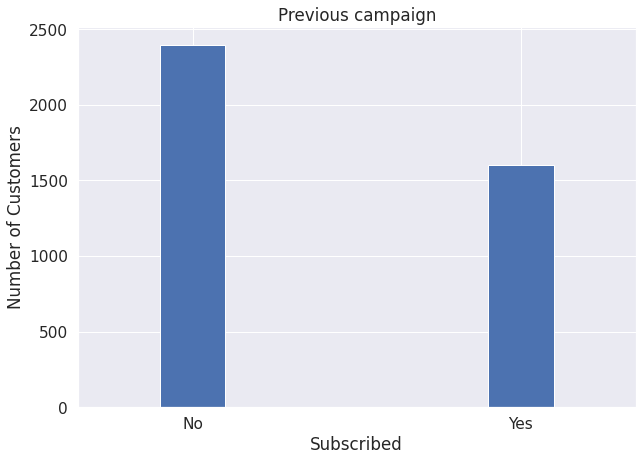

In [110]:
CarInsurancelabels = ['No','Yes']
sns.set(font_scale=1.4)
df['CarInsurance'].value_counts().plot(kind='bar', figsize=(10,7), width=0.2, rot=0)
plt.title ('Previous campaign')
plt.xlabel ('Subscribed')
plt.ylabel ('Number of Customers')
plt.xticks ([0,1], CarInsurancelabels)



*   Majority of the customers did not subscribed for car insurance




**Chart overview of categorical features**

In [22]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype
categorical=[]
for column in df:
    if is_object_dtype(df[column]):
        categorical.append(column)
print(categorical)

['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth']


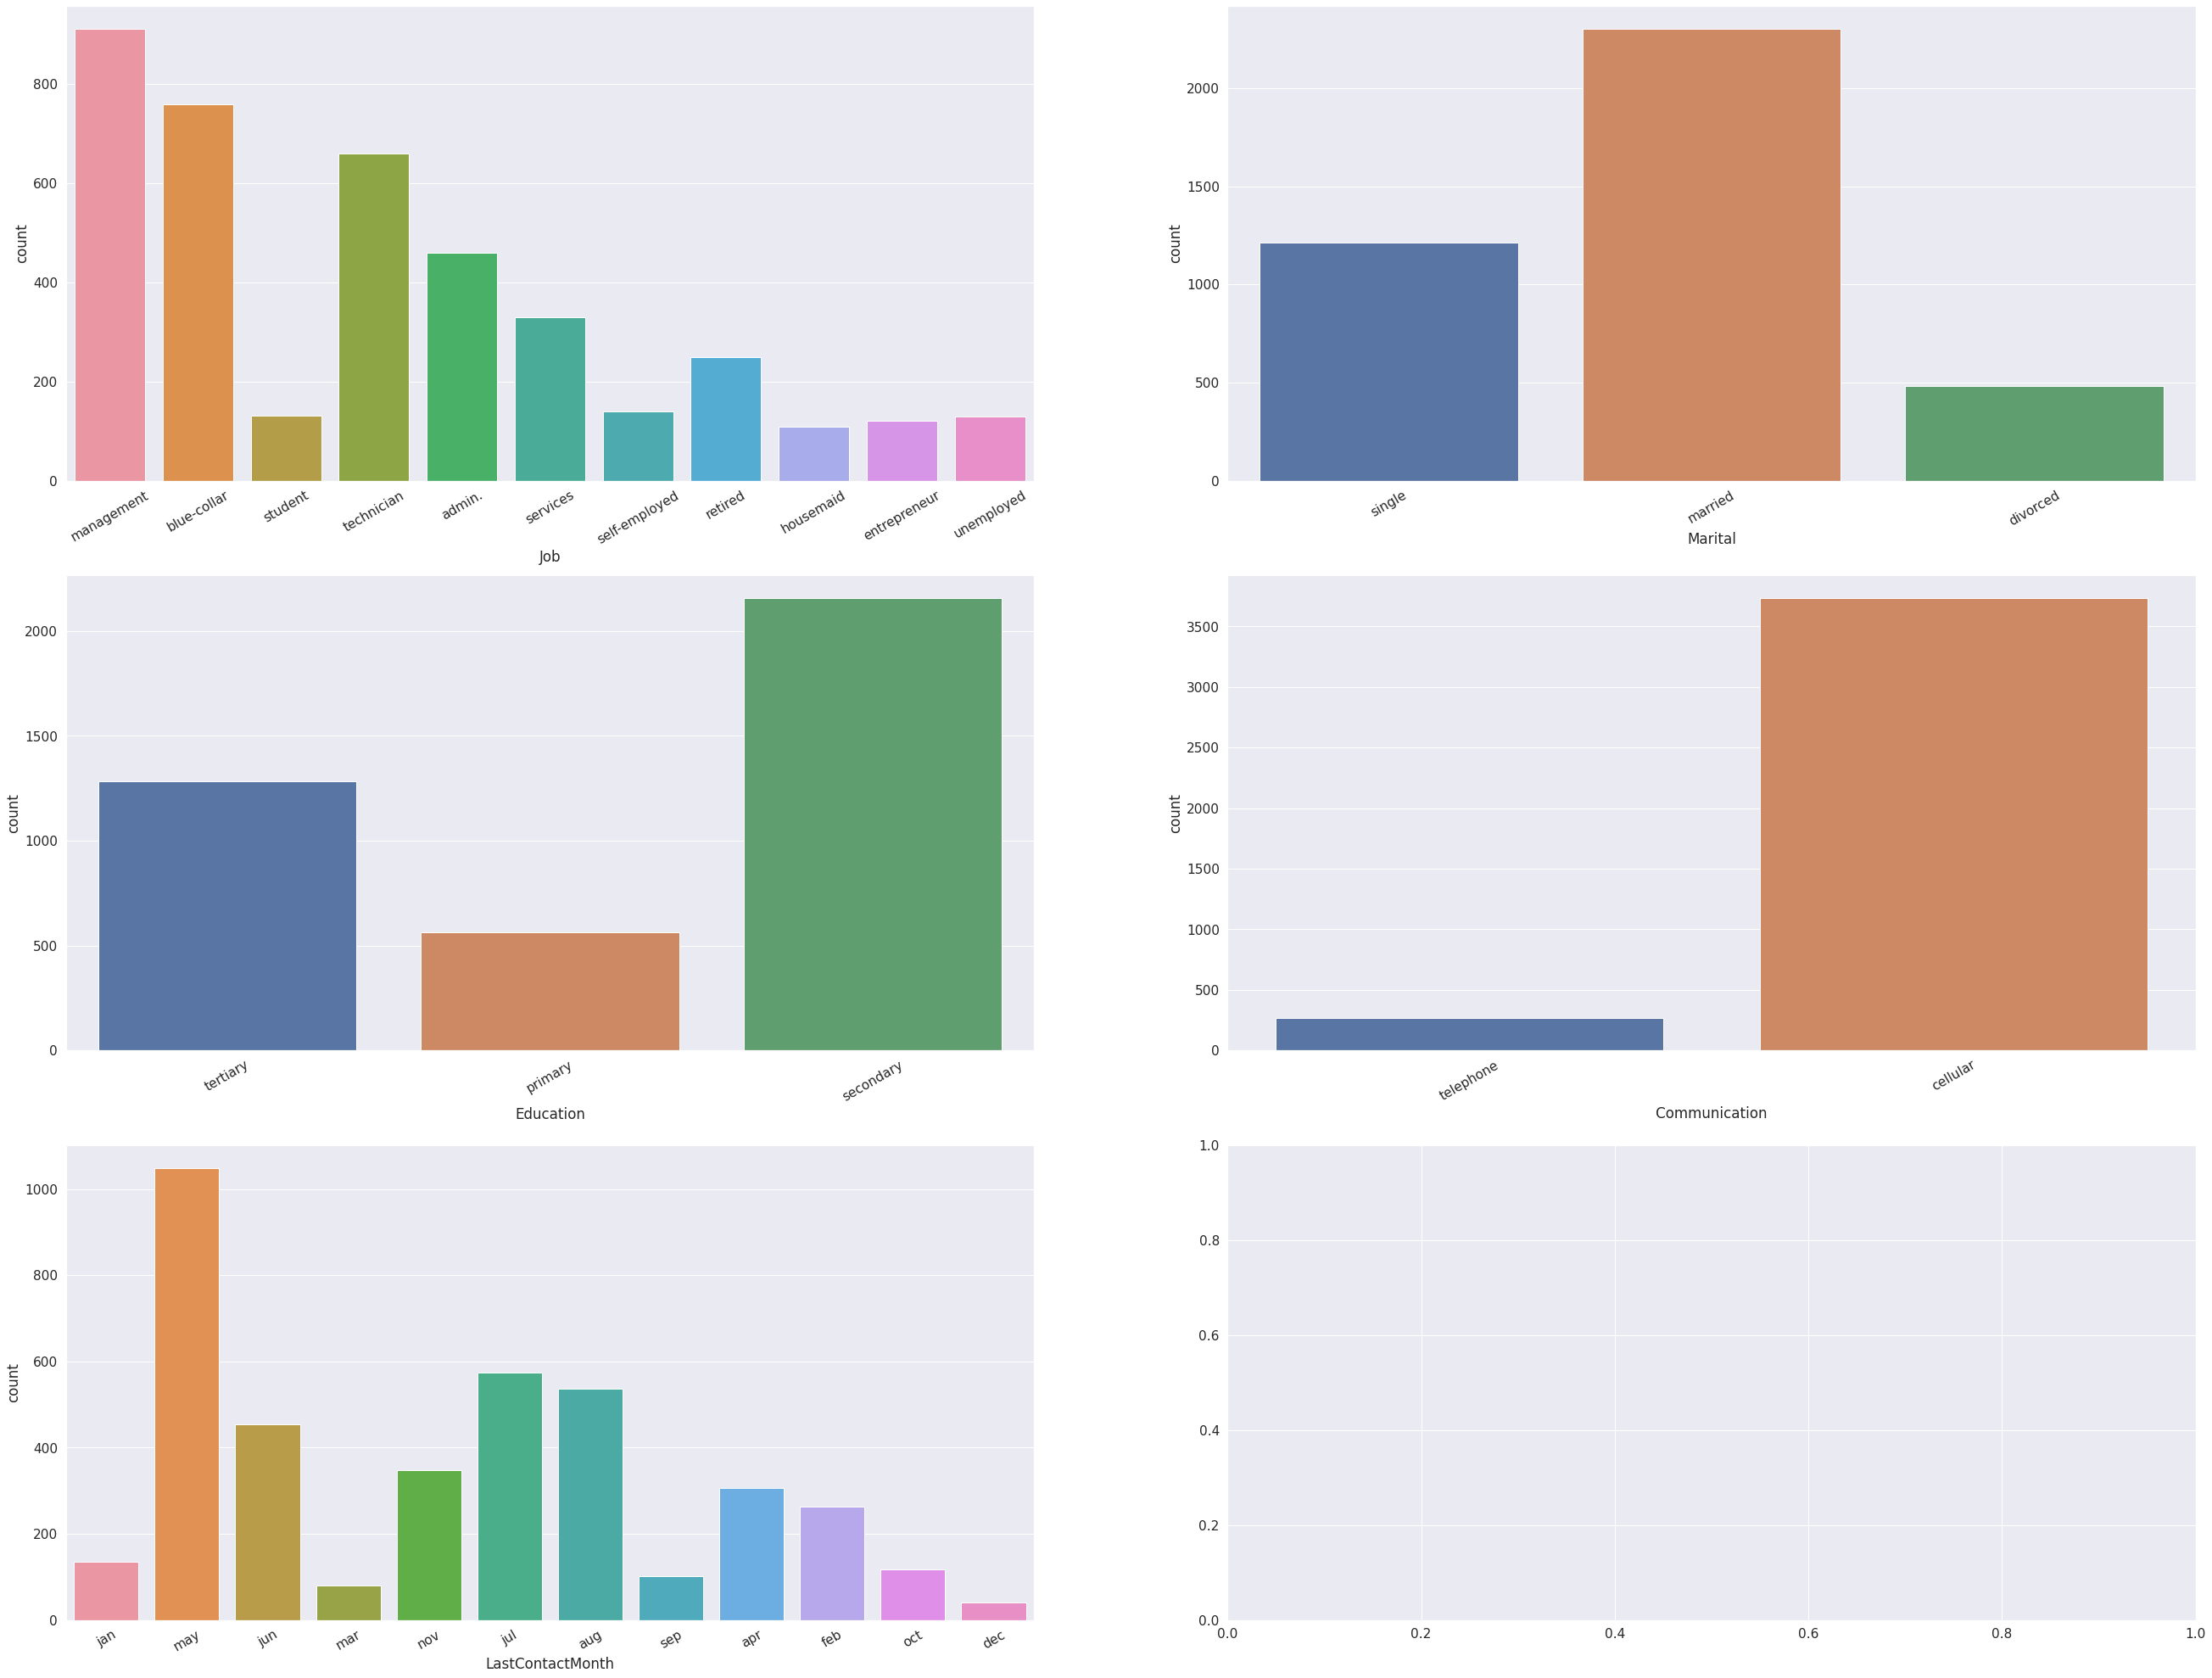

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(45, 35))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

In [24]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration(mins)
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,0,1
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,0,3
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,1,5
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,1,13
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,0,3


**Analysis of each feature in respect to number of subscriptions**

In [66]:
print('mininum age: ', df['Age'].min(), '\n', 'maxinum age: ', df['Age'].max())

mininum age:  18 
 maxinum age:  95


Text(0, 0.5, 'Number of Customers')

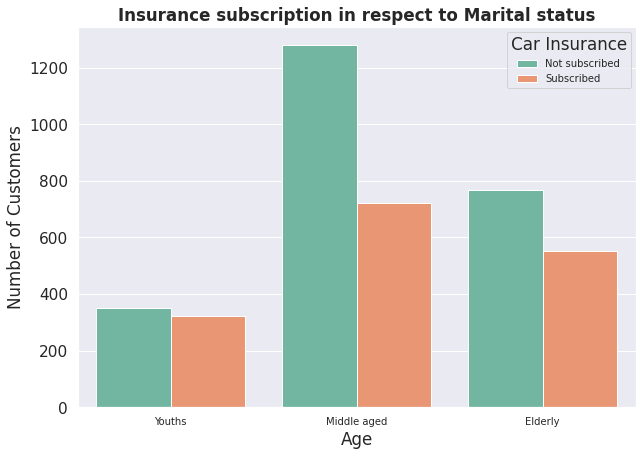

In [78]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x=pd.cut(df.Age, bins=[18,30,45,95], labels=['Youths', 'Middle aged', 'Elderly']), hue = 'CarInsurance', data=df, palette='Set2')
plt.title('Insurance subscription in respect to Marital status', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='upper right', fontsize=10)
Marital_chart = ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')



*   *The middle aged are the majority of the customers*



Text(0, 0.5, 'Number of Customers')

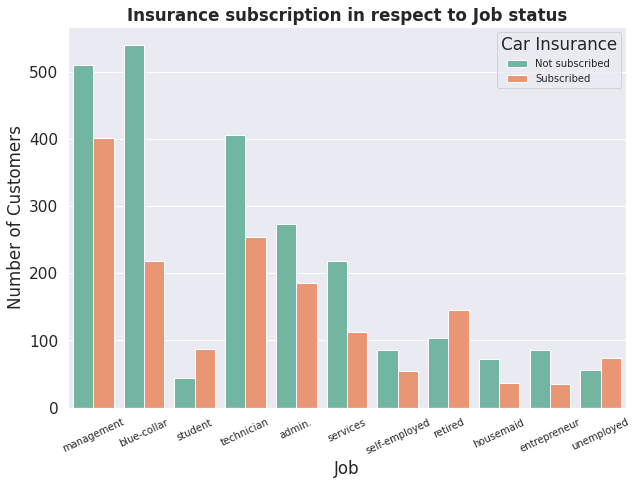

In [112]:
from numpy.ma.core import size
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Job', hue = 'CarInsurance', data=df,  palette='Set2')
plt.title('Insurance subscription in respect to Job status', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='upper right', fontsize=10)
job_chart = ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=25, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')

*   *Customers with management jobs have the highest number of subscriptions. However, the ratio of subscribed customers to unsubscribed custumers is in close proximity. We can further investigate the feedback from the customers to ascertain if the reason is beacuse they have an existing insurance with other companies.*

*   *Suprisingly, students, retired and the unemployed customers have high ratio of subscribtion.*


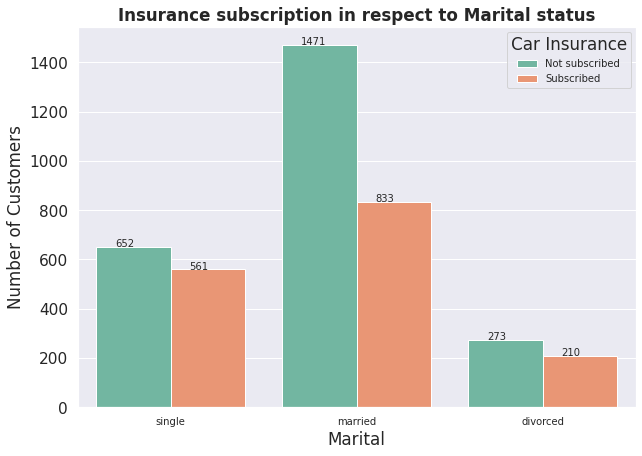

In [26]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Marital', hue = 'CarInsurance', data=df,  palette='Set2')
plt.title('Insurance subscription in respect to Marital status', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='upper right', fontsize=10)
Marital_chart = ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()), size=10)

*   *Married persons are the majority of the customers*
*   *This may be as a result of probability that most customers with management and blue collar jobs constitutes to the majority of married customers.*
*   *We will verify by plotting a chart to illustrate this hypothesis*



Text(0, 0.5, 'Marital Status')

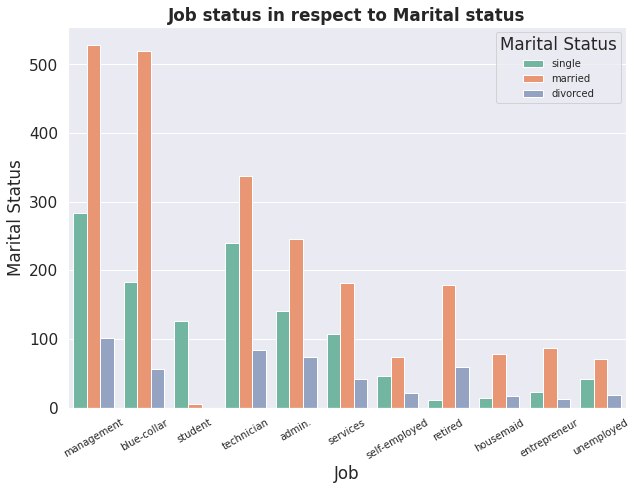

In [111]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Job', hue = 'Marital', data=df,  palette='Set2')
plt.title('Job status in respect to Marital status', fontweight='bold')
plt.legend(title= 'Marital Status', loc='best', fontsize=10)
Marital_chart = ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=30, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Marital Status')



*The chart above proofs the hypothesis that majority of customers in management and blue collar jobs are married is true*




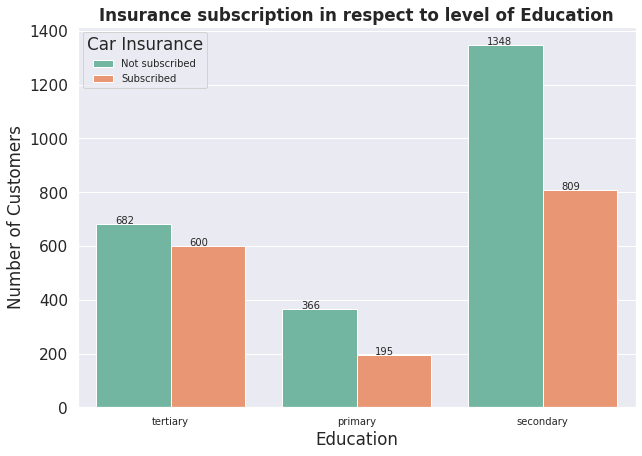

In [28]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Education', hue = 'CarInsurance', data=df,  palette='Set2')
plt.title('Insurance subscription in respect to level of Education', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='best', fontsize=10)
Education_chart = ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()), size=10)



*   *Majority of the customers have secondary education as the highest level of education. However, most of them did not subsribe for the insurance.*



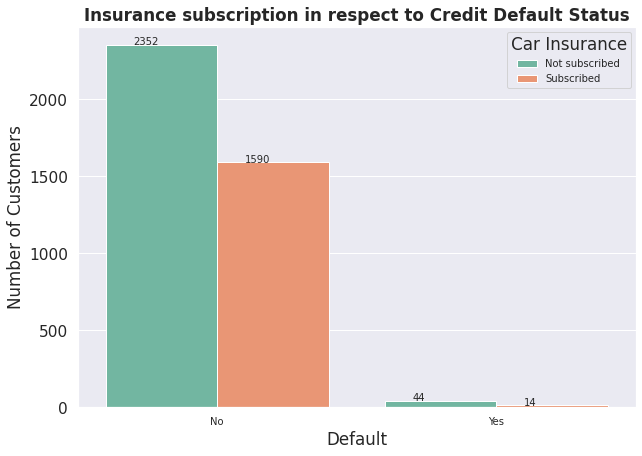

In [29]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Default', hue = 'CarInsurance', data=df,  palette='Set2')
plt.title('Insurance subscription in respect to Credit Default Status', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='best', fontsize=10)
default_labels = ['No', 'Yes']
default_chart = ax.set_xticklabels(
    ax.set_xticklabels(default_labels), 
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()), size=10)



*   *Very few of the customers have credit card default.*



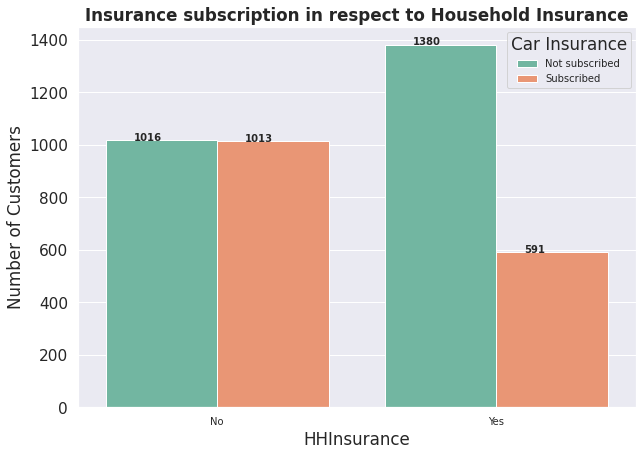

In [123]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='HHInsurance', hue = 'CarInsurance', data=df,  palette='Set2')
plt.title('Insurance subscription in respect to Household Insurance', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='upper right', fontsize=10)
HHInsurance_chart = ax.set_xticklabels(
    ax.set_xticklabels(default_labels), 
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()), size=10, weight='bold')

In [31]:
df.groupby(['HHInsurance','CarInsurance']).size().unstack()

CarInsurance,0,1
HHInsurance,,
0,1016,1013
1,1380,591


In [56]:
df['Balance'].mean()

1532.93725

In [58]:
max_balance = df['Balance'].max()

98417

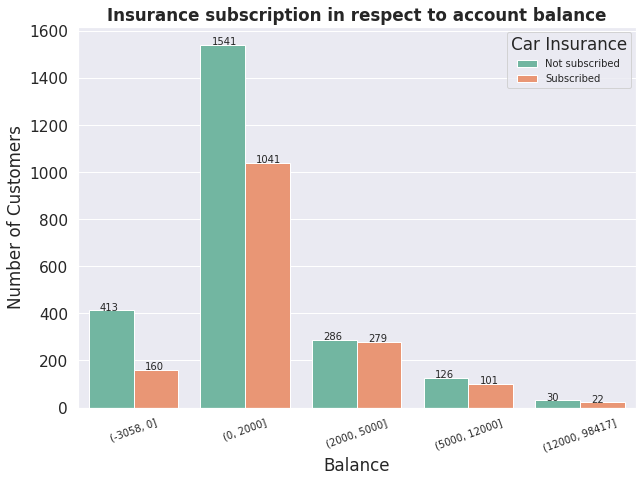

In [73]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x=pd.cut(df.Balance, bins=[-3058, 0, 2000, 5000, 12000, 98417]), hue = 'CarInsurance', data=df,  palette='Set2')
plt.title('Insurance subscription in respect to account balance', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='best', fontsize=10)
default_chart = ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=20, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()), size=10)


*   *Majority of customers have account balance in the range of 2000 USD*



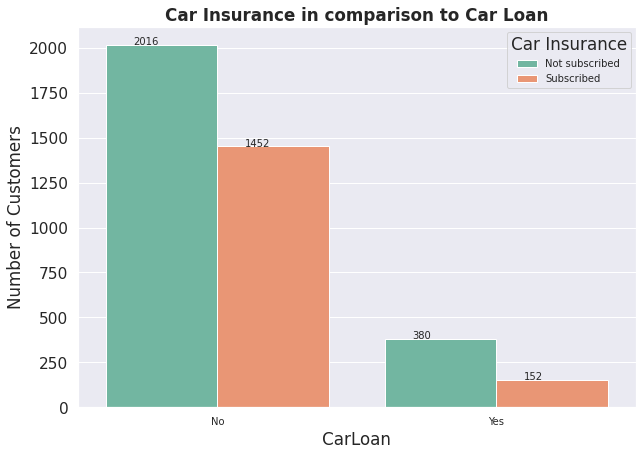

In [34]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='CarLoan', hue = 'CarInsurance', data=df,  palette='Set2')
plt.title('Insurance subscription in comparison to Car Loan', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='upper right', fontsize=10)
HHInsurance_chart = ax.set_xticklabels(
    ax.set_xticklabels(default_labels), 
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()), size=10, weight='light')



*   *Most of the customers do not have an existing car loan*



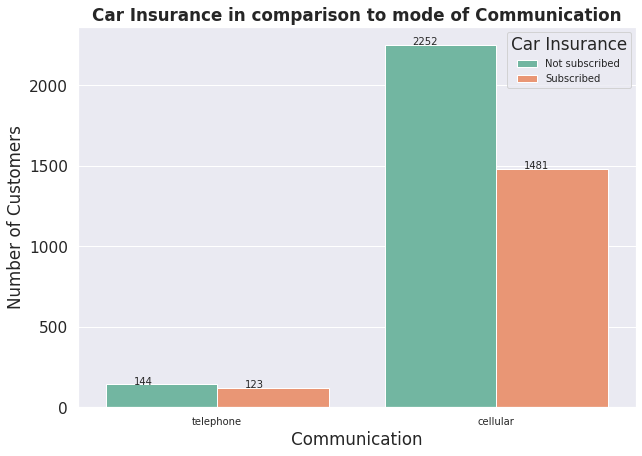

In [35]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Communication', hue = 'CarInsurance', data=df,  palette='Set2')
plt.title('Insurance subscription in respect to mode of Communication', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='upper right', fontsize=10)
HHInsurance_chart = ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()), size=10, weight='light')

*   *Most customers were contacted via cellular which is the common means of communication*



Text(0, 0.5, 'Number of Customers')

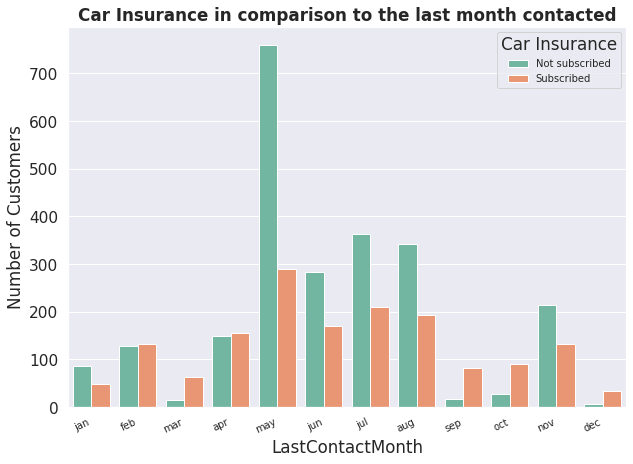

In [36]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.figure(figsize=(10,7))
ax = sns.countplot(x='LastContactMonth', hue = 'CarInsurance', data=df, order=month_order, palette='Set2')
plt.title('Insurance subscription in respect to the last month contacted', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='upper right', fontsize=10)
job_chart = ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=25, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')

The month of May was the most active month of campaign

Text(0, 0.5, 'Number of Customers')

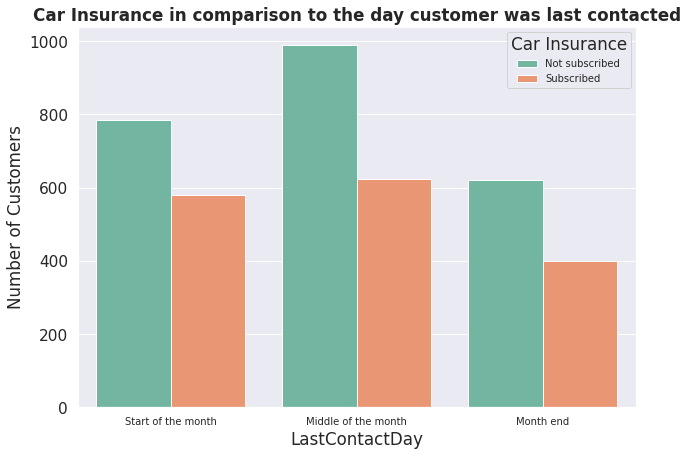

In [37]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x=pd.cut(df.LastContactDay, bins=3, labels=['Start of the month','Middle of the month','Month end']), hue = 'CarInsurance', data=df,  palette='Set2')
plt.title('Insurance subscription in respect to the day customer was last contacted', fontweight='bold')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='best', fontsize=10)
default_chart = ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=10
)
ax.set_ylabel('Number of Customers')



*   *The middle of the month is the most active period*



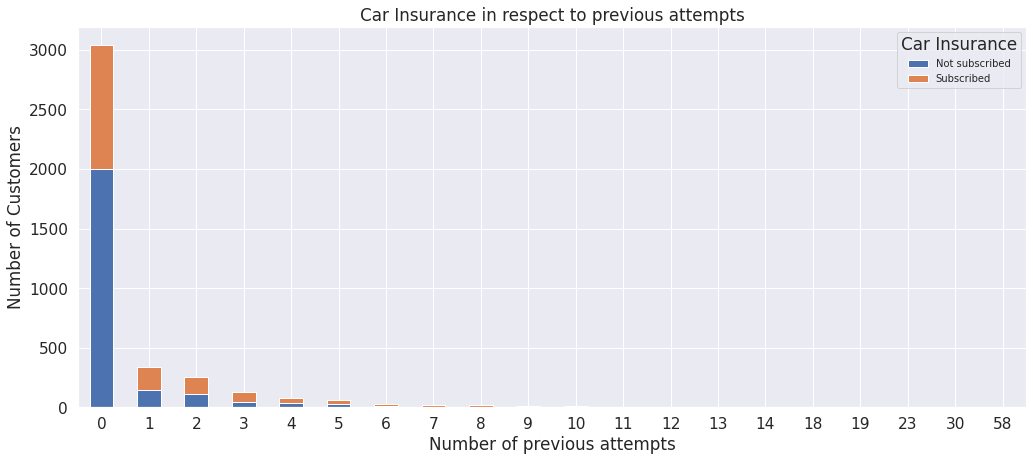

In [38]:
df_plot_Prev = pd.DataFrame(df.groupby(['CarInsurance', 'PrevAttempts']).size().reset_index().pivot(columns='CarInsurance', index='PrevAttempts', values=0))
df_plot_Prev['bins'] = pd.cut(x=df_plot_Prev.index, bins=[-1,0,1,np.inf] ,include_lowest=True)
df_plot_Prev
df_plot_Prev.plot(kind='bar', stacked='True', rot=0, figsize=(17,7))
plt.title('Insurance subscription in respect to previous attempts')
plt.xlabel('Number of previous attempts')
plt.ylabel('Number of Customers')
plt.legend(title= 'Car Insurance', labels=['Not subscribed','Subscribed'], loc='best', fontsize=10)



*   *Majority of the customers were not previously contacted*



In [44]:
Duration_crosstab = pd.crosstab(df['CallDuration(mins)'], df['CarInsurance'], colnames=['Car Insurance'], rownames=['Call Duration in mins'])
Duration_crosstab['Total_Campaign'] =  Duration_crosstab[0] + Duration_crosstab[1]
Duration_crosstab

Car Insurance,0,1,Total_Campaign
Call Duration in mins,,,
0,290,2,292
1,579,57,636
2,486,153,639
3,307,169,476
4,209,159,368
5,152,107,259
6,98,112,210
7,80,97,177
8,54,85,139


Text(0, 0.5, 'Number of Customers')

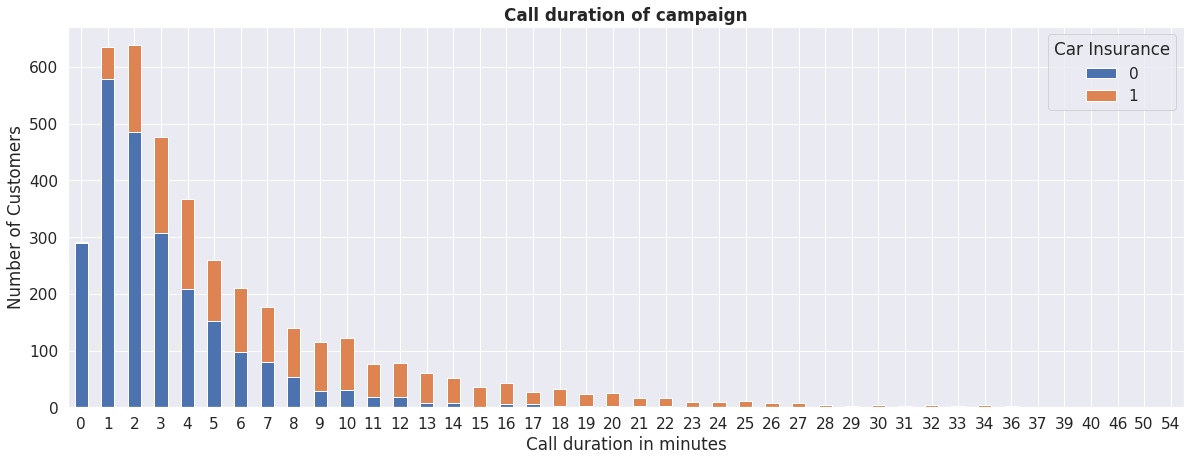

In [45]:
Duration_crosstab.drop(['Total_Campaign'], axis=1).plot(kind='bar', stacked='True', rot=0, figsize=(20,7))
plt.title('Call duration of campaign', fontweight='bold')
plt.xlabel('Call duration in minutes')
plt.ylabel('Number of Customers')



*   *There seems to be a positive correlation between the call duration and subscribed customers*

*   *Let's plot a heatmap diagram and line chart to show the degree of correlation*


Text(0.5, 1.0, 'Heatmap diagram showing correlation of features')

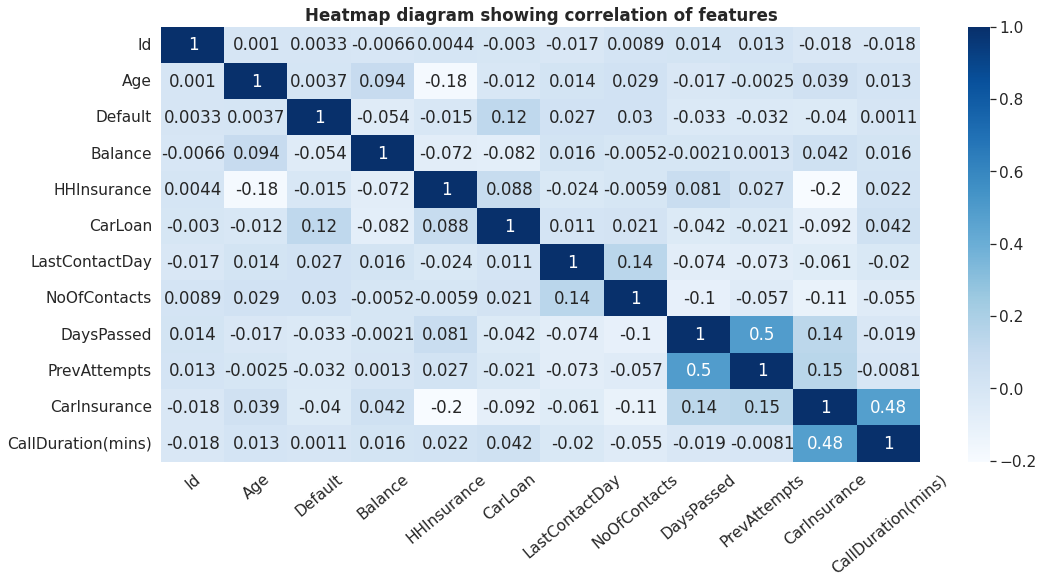

In [48]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=40)
plt.title('Heatmap diagram showing correlation of features', fontweight='bold')



*   *The heatmap above shows there is high correlation between call duration and the target variable CarInsurance*
*   *There is also a high correlation between DaysPassed and PrevAttempts*



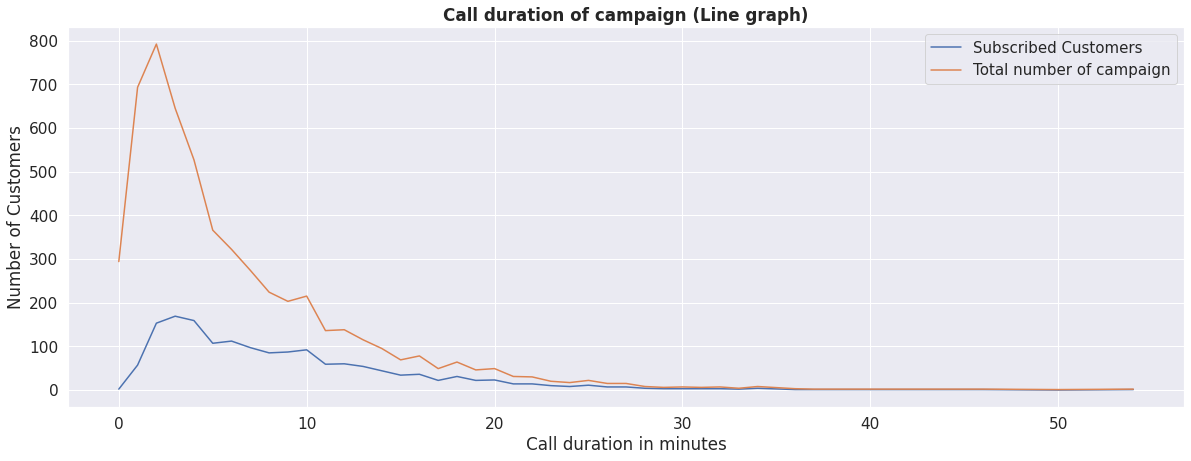

In [113]:
Duration_crosstab.drop([0], axis=1).plot(kind='line', stacked='True', rot=0, figsize=(20,7))
plt.title('Call duration of campaign (Line graph)', fontweight='bold')
plt.xlabel('Call duration in minutes')
plt.ylabel('Number of Customers')
plt.legend(labels=['Subscribed Customers','Total number of campaign'], loc='best', fontsize=15)

*   *Majority of the campaign call durations were between 1-3 minutes according to the line chart above.*
*   *The steepness and convergence of the total number of campaingns and subscribed customers in the line grapgh indicates that the longer a customer is engaged on the call, the more likely he/she will subscribe for the product.*

**Outlier Detection**

Text(0.5, 1.0, 'Outlier detection (Age)')

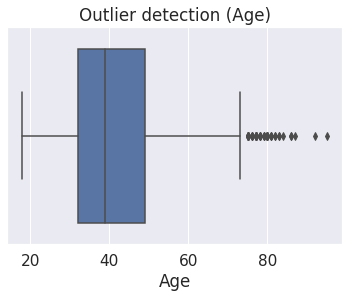

In [119]:
sns.boxplot(df['Age'])
plt.title('Outlier detection (Age)')

Text(0.5, 1.0, 'Gaussian distribution (Age)')

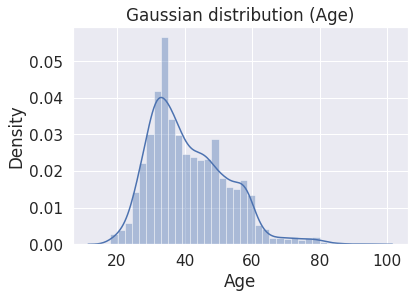

In [120]:
sns.distplot(df['Age'])
plt.title('Gaussian distribution (Age)')

*   *Majority of the customers are within ages 30-50 years*
*   *Outliers are detected in older years*



Text(0.5, 1.0, 'Outlier detection (Account Balance)')

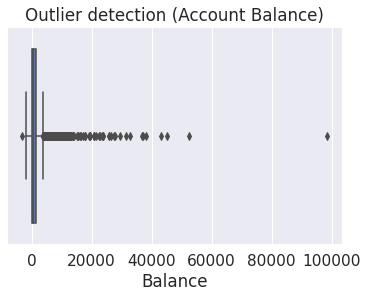

In [121]:
sns.boxplot(df['Balance'])
plt.title('Outlier detection (Account Balance)')

*   *Outliers are detected in higher account balances*

**Analysing outlieirs of Age and Account Balance.**

In [122]:
for col in ['Age','Balance']:
    Q3, Q1 = np.percentile(df[col], [75, 25])
    print('===================================================')
    print(col)
    print('===================================================')
    IQR = Q3 - Q1
    print('Interval:[', Q1 - 1.5*IQR,'And',Q3+ 1.5*IQR,']')
    print('min=',df[col].min())
    print('max=',df[col].max())
    
    max=((df[col]>= (Q3 + 1.5*IQR)).sum())
    min=((df[col]<= (Q1 - 1.5*IQR)).sum())
    
    print('pecentage of outliers(max):',max/df.shape[0])
    print('pecentage of outliers(min):',min/df.shape[0])

    print('\n \n')

Age
Interval:[ 6.5 And 74.5 ]
min= 18
max= 95
pecentage of outliers(max): 0.013
pecentage of outliers(min): 0.0

 

Balance
Interval:[ -2151.0 And 3881.0 ]
min= -3058
max= 98417
pecentage of outliers(max): 0.09575
pecentage of outliers(min): 0.00025

 



**In order to model a machine learning technique to train the dataset and predict the outcome of the next campaign, we have to:**

1.   Remove outliers from the training dataset
2.   Perform feature engineering on some of the features by converting object type features to numerical. This is because machine learning models performs best on numerical features.
3.   Train and test the dataset.
1.   Compare performance metrics of different machine learning models to ascertain the best fit.


